In [73]:
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spsl
import time

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline  

from utils.archiver import *

In [74]:
unarch = Unarchiver('/home/epz/scratch/test_gh_system.arch')

In [84]:
G = unarch.G
h = unarch.h
G = G.tocsr()
(N,N) = G.shape
n = int(np.round(np.power(N / 7,1./3.)))
print n


11


In [76]:
np.savez('/home/epz/scratch/test_gh_system_{}.npz'.format(n), 
         G_data=G.data, G_indices=G.indices, G_indptr=G.indptr, h=h)

In [77]:
start = time.time()
x = spsl.spsolve(G,h)
print time.time() - start
print np.linalg.norm(G*x - h)

0.966683864594
6.14702999115e-13


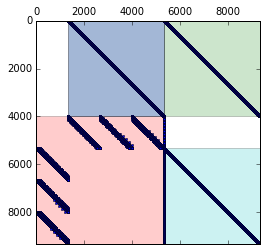

In [81]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
N = n**3 + 1  # 1 for augmentation var

# Red is M
ax1.add_patch(
    patches.Rectangle(
        (0, 3*N),   # (x,y)
        4*N,          # width
        4*N,          # height
        alpha=0.2,
        fc='r'
    ),
)

ax1.add_patch(
    patches.Rectangle(
        (N, 0),   # (x,y)
        3*N,          # width
        3*N,          # height
        alpha=0.2,
        fc='g'
    ),
)
ax1.add_patch(
    patches.Rectangle(
        (N, 0),   # (x,y)
        3*N,          # width
        3*N,          # height
        alpha=0.2,
        fc='b'
    ),
)
ax1.add_patch(
    patches.Rectangle(
        (4*N, 0),   # (x,y)
        3*N,          # width
        3*N,          # height
        alpha=0.2,
        fc='g'
    ),
)
ax1.add_patch(
    patches.Rectangle(
        (4*N, 4*N),   # (x,y)
        3*N,          # width
        3*N,          # height
        alpha=0.2,
        fc='c'
    ),
)

ax1.spy(G,precision=0.05, markersize=2)
plt.savefig('/home/epz/scratch/gh_system_{}.png'.format(n))